In [1]:
!pip install keras-preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00


In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras import backend as K
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Input
from keras.models import Sequential, Model
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn import metrics

In [121]:
df = pd.read_csv('drive/MyDrive/CSC413_data/leetcode.csv')

df.head()

,description,Array,Dynamic Programming,String,Math,Tree,Depth-first Search,Greedy,Hash Table,Binary Search,...,Random,Dequeue,Binary Search Tree,Suffix Array,Rolling Hash,Reservoir Sampling,Rejection Sampling,Memoization,OOP,Meet in the Middle
0,Given an array of integers `nums` and an integ...,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,You are given two non-empty linked lists repre...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Given a string `s`, find the length of the lon...",0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Given two sorted arrays `nums1` and `nums2` of...,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"Given a string `s`, return the longest palindr...",0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
inputs = df['description'].values
inputs = [i.lower() for i in inputs]
labels = df.iloc[:, 1:].values

print(inputs[0])
print(labels[0])

given an array of integers `nums` and an integer `target`, return indices of the two numbers such that they add up to `target`.

you may assume that each input would have exactly one solution, and you may not use the same element twice.

you can return the answer in any order.


example 1:
input: nums = [2,7,11,15], target = 9
output: [0,1]
output: because nums[0] + nums[1] == 9, we return [0, 1].

example 2:
input: nums = [3,2,4], target = 6
output: [1,2]

example 3:
input: nums = [3,3], target = 6
output: [0,1]

constraints:
`2 <= nums.length <= 103`
`-109 <= nums[i] <= 109`
`-109 <= target <= 109`
only one valid answer exists.
[1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [5]:
target_cols = df.iloc[:, 1:].columns.tolist()
print(target_cols)

['Array', 'Dynamic Programming', 'String', 'Math', 'Tree', 'Depth-first Search', 'Greedy', 'Hash Table', 'Binary Search', 'Breadth-first Search', 'Sort', 'Two Pointers', 'Backtracking', 'Stack', 'Design', 'Graph', 'Bit Manipulation', 'Heap', 'Linked List', 'Recursion', 'Union Find', 'Sliding Window', 'Trie', 'Divide and Conquer', 'Segment Tree', 'Ordered Map', 'Queue', 'Minimax', 'Geometry', 'Binary Indexed Tree', 'Brainteaser', 'Topological Sort', 'Line Sweep', 'Random', 'Dequeue', 'Binary Search Tree', 'Suffix Array', 'Rolling Hash', 'Reservoir Sampling', 'Rejection Sampling', 'Memoization', 'OOP', 'Meet in the Middle']


In [6]:
# Tokenize the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(inputs)
sequences = tokenizer.texts_to_sequences(inputs)

In [7]:
print(sequences[1])
print(inputs[1])

[22, 20, 25, 58, 133, 114, 234, 531, 266, 58, 133, 328, 89, 1, 159, 20, 1700, 14, 648, 80, 9, 46, 6, 205, 81, 160, 7, 301, 289, 203, 1, 58, 141, 9, 23, 1, 91, 57, 7, 234, 78, 22, 115, 307, 1, 58, 141, 225, 61, 230, 69, 373, 312, 580, 1, 34, 4, 452, 10, 2, 11, 1946, 3, 13, 5, 2085, 16, 26, 13, 12, 27, 4, 51, 21, 5118, 5119, 5120, 10, 3, 11, 1946, 4, 2085, 4, 12, 4, 10, 5, 11, 1946, 45, 45, 45, 45, 45, 45, 45, 2085, 45, 45, 45, 45, 12, 51, 45, 45, 45, 4, 4, 4, 2, 37, 1, 34, 6, 81, 14, 46, 234, 78, 8, 14, 1, 105, 2, 73, 4, 56, 124, 45, 41, 8, 184, 24, 1, 78, 173, 7, 34, 24, 213, 61, 66, 373, 620]
you are given two non-empty linked lists representing two non-negative integers. the digits are stored in reverse order, and each of their nodes contains a single digit. add the two numbers and return the sum as a linked list.

you may assume the two numbers do not contain any leading zero, except the number 0 itself.


example 1:
input: l1 = [2,4,3], l2 = [5,6,4]
output: [7,0,8]
explanation: 342

In [8]:
max_len = max([len(s) for s in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

In [86]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

def my_accuracy(y_true, y_pred):
    # turn y_pred to 0 or 1 with threshold 0.5
    y_true = y_true.numpy()
    y_pred = y_pred.numpy()
    y_pred = np.where(y_pred > 0.5, 1, 0)
    return metrics.accuracy_score(y_true, y_pred)

In [88]:
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128)(input_layer)
lstm_layer = LSTM(128)(embedding_layer)
output_layer = Dense(43, activation='sigmoid')(lstm_layer)
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[my_accuracy], run_eagerly=True)

In [72]:
# split some for test 
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.1, random_state=42)

In [101]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
36/36 [==============================] - 337s 9s/step - loss: 0.0825 - my_accuracy: 0.2250 - val_loss: 0.1359 - val_my_accuracy: 0.0837
Epoch 2/30
36/36 [==============================] - 337s 9s/step - loss: 0.0818 - my_accuracy: 0.2420 - val_loss: 0.1407 - val_my_accuracy: 0.0714
Epoch 3/30
36/36 [==============================] - 291s 8s/step - loss: 0.0814 - my_accuracy: 0.2285 - val_loss: 0.1408 - val_my_accuracy: 0.0610
Epoch 4/30
36/36 [==============================] - 291s 8s/step - loss: 0.0791 - my_accuracy: 0.2477 - val_loss: 0.1376 - val_my_accuracy: 0.1039
Epoch 5/30
36/36 [==============================] - 283s 8s/step - loss: 0.0771 - my_accuracy: 0.2660 - val_loss: 0.1388 - val_my_accuracy: 0.0802
Epoch 6/30
36/36 [==============================] - 262s 7s/step - loss: 0.0756 - my_accuracy: 0.2872 - val_loss: 0.1392 - val_my_accuracy: 0.0900
Epoch 7/30
36/36 [==============================] - 264s 7s/step - loss: 0.0743 - my_accuracy: 0.2972 - val_loss: 0.14

In [102]:
history.history

{'loss': [0.08249825239181519,
  0.08180364221334457,
  0.08135230839252472,
  0.07914748787879944,
  0.07712643593549728,
  0.07560274004936218,
  0.07427468150854111,
  0.07319221645593643,
  0.07188176363706589,
  0.07037080079317093,
  0.06927025318145752,
  0.06779814511537552,
  0.06677069514989853,
  0.06549151986837387,
  0.06438739597797394,
  0.06354323029518127,
  0.06243516877293587,
  0.062008753418922424,
  0.06070650368928909,
  0.05996417999267578,
  0.05916435271501541,
  0.05806722119450569,
  0.058428313583135605,
  0.05728379637002945,
  0.05556416139006615,
  0.05448213592171669,
  0.05314476042985916,
  0.05231519043445587,
  0.051706116646528244,
  0.05111909657716751],
 'my_accuracy': [0.22500000894069672,
  0.2420138716697693,
  0.22847223281860352,
  0.24774305522441864,
  0.26597222685813904,
  0.2871527671813965,
  0.29722222685813904,
  0.30347222089767456,
  0.31996527314186096,
  0.3348958194255829,
  0.3532986044883728,
  0.34930554032325745,
  0.3663194

In [97]:
all_train_loss = []
all_val_loss = []
all_train_acc = []
all_val_acc = []

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_loss_and_acc(loss_vals, eval_accs, title):
    sns.set(style='darkgrid')
    sns.set(font_scale=1.5)
    plt.rcParams["figure.figsize"] = (8,6)
    fig, ax1 = plt.subplots(1,1)
    ax1.plot(loss_vals, 'b-o', label = 'training loss')
    ax2 = ax1.twinx()
    ax2.plot(eval_accs, 'y-o', label = 'validation accuracy')
    ax2.set_title(title)
    ax2.set_xlabel("Epoch")
    ax1.set_ylabel("Loss", color='b')
    ax2.set_ylabel("Accuracy", color='y')
    ax1.tick_params(axis='y', rotation=0, labelcolor='b' )
    ax2.tick_params(axis='y', rotation=0, labelcolor='y' )
    plt.show()

In [103]:
all_train_loss.extend(history.history['loss'])
all_val_loss.extend(history.history['val_loss'])
all_train_acc.extend(history.history['my_accuracy'])
all_val_acc.extend(history.history['val_my_accuracy'])

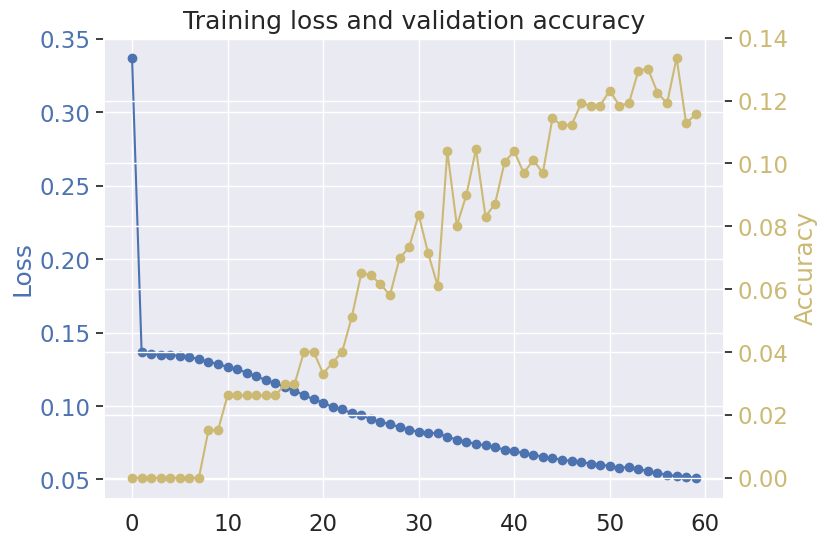

In [104]:
plot_loss_and_acc(all_train_loss, all_val_acc, "Training loss and validation accuracy")

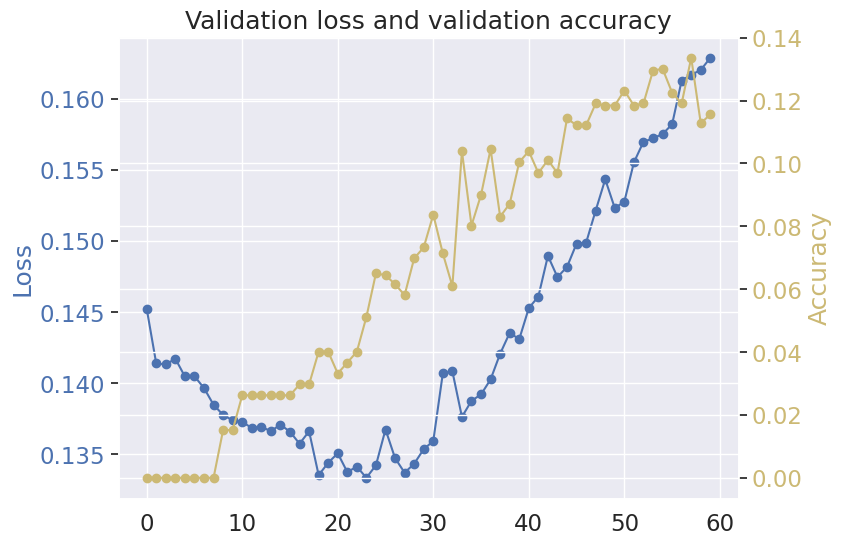

In [105]:
plot_loss_and_acc(all_val_loss, all_val_acc, "Validation loss and validation accuracy")

In [13]:
def label_to_text(labels):
    return [target_cols[i] for i in range(len(labels)) if labels[i]]

In [14]:
from sklearn import metrics

In [122]:
print(X_test.shape)
print(X_train.shape)

(158, 896)
(1413, 896)


In [113]:
X_test1 = pad_sequences(tokenizer.texts_to_sequences(["""You are given the root of a binary tree.

A ZigZag path for a binary tree is defined as follow:

Choose any node in the binary tree and a direction (right or left).
If the current direction is right, move to the right child of the current node; otherwise, move to the left child.
Change the direction from right to left or from left to right.
Repeat the second and third steps until you can't move in the tree.
Zigzag length is defined as the number of nodes visited - 1. (A single node has a length of 0).

Return the longest ZigZag path contained in that tree.
"""]), maxlen=max_len)
print(type(X_test1))
y_pred1 = model.predict(X_test1)

print(y_pred1)

<class 'numpy.ndarray'>
1/1 [==============================] - 11s 11s/step
[[1.2841339e-03 3.7455786e-02 2.4230446e-04 1.8163151e-04 9.5865840e-01
  5.1732039e-01 6.8231377e-05 5.2998573e-02 4.2026830e-03 2.2778457e-02
  3.9286879e-04 1.1020341e-03 1.4090568e-02 1.8678822e-01 5.6375068e-01
  5.1290557e-02 1.4916128e-02 2.6747810e-03 4.1555773e-02 5.4771483e-02
  2.4468737e-02 3.0720429e-04 5.7121357e-03 1.8221630e-02 9.6052838e-03
  5.1101472e-02 2.1531546e-02 4.1441438e-03 1.9776525e-03 2.4195460e-03
  2.4713334e-03 1.1030188e-02 1.6158252e-03 6.9804874e-04 2.4251530e-03
  5.7233669e-02 4.5171237e-05 4.5724033e-04 1.5221331e-03 6.2216562e-04
  2.1899962e-03 1.4257195e-04 1.7781803e-04]]


In [120]:
idxs = []
for i, val in enumerate(y_pred1[0]):
    if val >= 0.5:
        idxs.append(i)
top_preds = [0] * len(target_cols)
for idx in idxs:
    top_preds[idx] = 1
print(label_to_text(top_preds))

['Tree', 'Depth-first Search', 'Stack', 'Design']


In [107]:
print(X_test.shape)

(158, 896)


In [125]:
# test label count accuracy, select top number of labels from prediction based on original label count
test_pred = model.predict(X_test)
accuracies = []
for i, res in enumerate(test_pred):
    # if i == 5: break
    top_n = np.argsort(res)[-y_test[i].sum():][::-1]
    pred_labels = [0] * len(target_cols)
    for j in top_n:
        pred_labels[j] = 1
    # print(f"Original labels: {label_to_text(y_test[i])}")
    # print(f"Predicted labels: {label_to_text(pred_labels)}")
    accuracies.append(metrics.accuracy_score(y_test[i], pred_labels))
print(f'mean accuracy: {np.mean(accuracies)}')

5/5 [==============================] - 27s 4s/step
mean accuracy: 0.9499558433912274


In [124]:
# test label count accuracy, select top number of labels from prediction based on original label count
test_pred = model.predict(X_test)
preds = []
for i, res in enumerate(test_pred):
    # if i == 5: break
    top_n = np.argsort(res)[-y_test[i].sum():][::-1]
    pred_labels = [0] * len(target_cols)
    for j in top_n:
        pred_labels[j] = 1
    # print(f"Original labels: {label_to_text(y_test[i])}")
    # print(f"Predicted labels: {label_to_text(pred_labels)}")
    preds.append(pred_labels)
print(f'mean accuracy: {metrics.accuracy_score(y_test, preds)}')

5/5 [==============================] - 19s 3s/step
mean accuracy: 0.17721518987341772
